In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# initiating random number
np.random.seed(11)

# creating the data set
mu_x1, sigma_x1 = 0, 0.1
x2_mu_diff = 0.35
# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000),
 'x2': np.random.normal(mu_x1, sigma_x1 , 1000),
 'type': 0})

# creating the second distribution
d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000) +
x2_mu_diff,
 'x2': np.random.normal(mu_x1, sigma_x1 , 1000) +
x2_mu_diff,
 'type': 1})


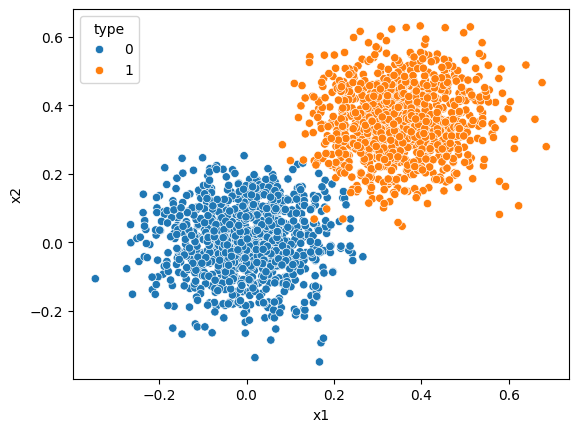

In [17]:
data = pd.concat([d1, d2], ignore_index=True)
ax = sns.scatterplot(x="x1", y="x2", hue="type",
 data=data)

In [18]:
class Perceptron(object):
 """
 Simple implementation of the perceptron algorithm
 """
 def __init__(self, w0=1, w1=0.1, w2=0.1):
  self.w0 = w0 # bias
  self.w1 = w1
  self.w2 = w2


In [19]:
def step_function(self, z):
 if z >= 0:
  return 1
 else:
  return 0

In [20]:
def weighted_sum_inputs(self, x1, x2):
 return sum([1 * self.w0, x1 * self.w1, x2 * self.w2])

In [21]:
def predict(self, x1, x2):
 """
 Uses the step function to determine the output
 """
 z = self.weighted_sum_inputs(x1, x2)
 return self.step_function(z)

Epoch 1: errors = 33


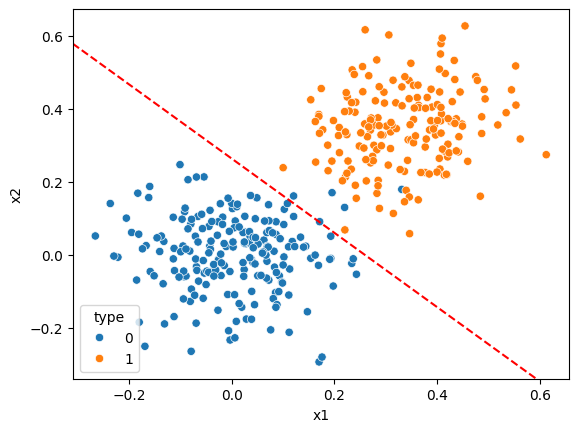

In [31]:
# Define the Perceptron class
class Perceptron:
    """
    Simple implementation of the perceptron algorithm
    """

    def __init__(self, w0=1, w1=0.1, w2=0.1):
        self.w0 = w0  # bias
        self.w1 = w1
        self.w2 = w2

    def step_function(self, z):
        if z >= 0:
            return 1
        else:
            return 0

    def weighted_sum_inputs(self, x1, x2):
        return self.w0 + x1 * self.w1 + x2 * self.w2

    def predict(self, x1, x2):
        z = self.weighted_sum_inputs(x1, x2)
        return self.step_function(z)

    def predict_boundary(self, x):
        return -(self.w1 * x + self.w0) / self.w2

    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        # Train the model given the dataset
        errors = []
        for epoch in range(epochs):
            error = 0
            for i in range(0, len(X)):
                x1, x2 = X.iloc[i]['x1'], X.iloc[i]['x2']
                target = y.iloc[i]
                prediction = self.predict(x1, x2)
                update = step * (target - prediction)
                self.w1 += update * x1
                self.w2 += update * x2
                self.w0 += update
                error += int(update != 0.0)
            errors.append(error)
            if verbose:
                print(f"Epoch {epoch + 1}: errors = {error}")
        return errors

# Instantiate the Perceptron with initial weights
my_perceptron = Perceptron(w0=0.1, w1=0.1, w2=0.1)

# Train the perceptron on the training set
errors = my_perceptron.fit(train_x, train_y, epochs=1, step=0.005)

# Plotting the decision boundary on a scatterplot
ax = sns.scatterplot(x="x1", y="x2", hue="type", data=data[~msk])
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = my_perceptron.predict_boundary(x_vals)
ax.plot(x_vals, y_vals, '--', c="red")

plt.show()
